# Solutions for the lecture "Variational quantum algorithms for industry"

## TASK1

Build a circuit that outputs the state with probabilities [{4: 0.25, 7: 0.25, 8: 0.25, 11: 0.25}]

    

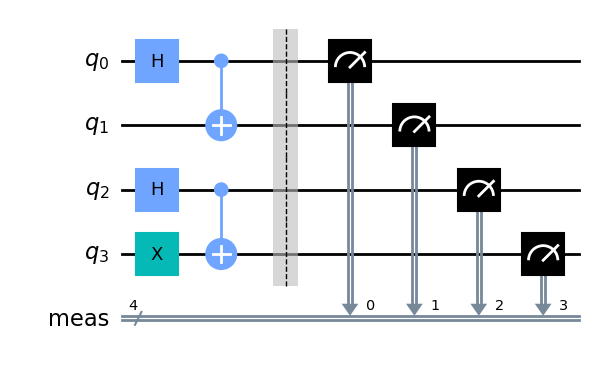

In [16]:
from qiskit import QuantumCircuit

#define quantum circuit
qc = QuantumCircuit(4)

#add gates
qc.h(0)
qc.cx(0,1)
qc.h(2)
qc.x(3)
qc.cx(2,3)

qc.measure_all()

#draw
qc.draw('mpl', style='clifford') #draw

In [19]:
result = sampler.run(qc)
print(result)

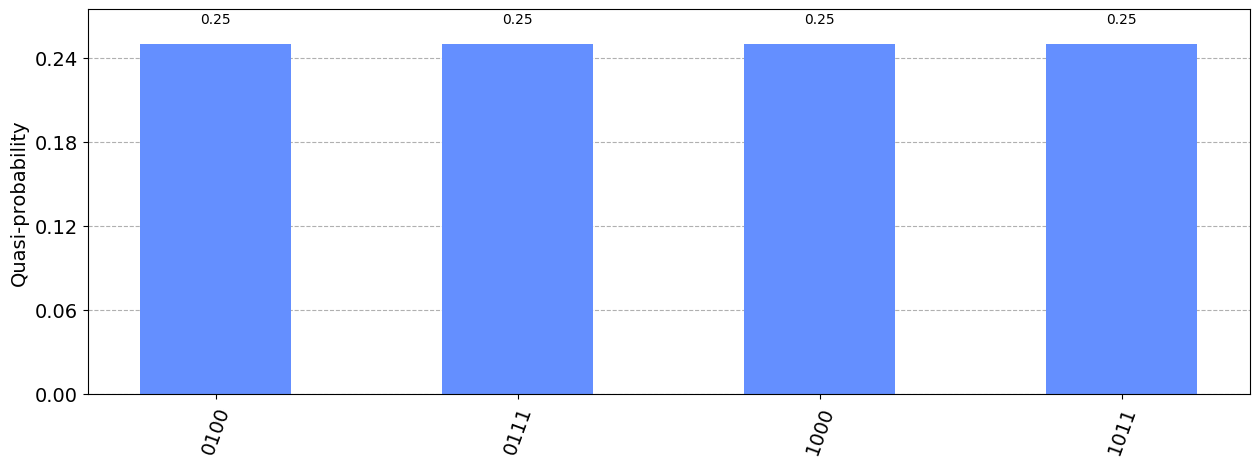

In [15]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_distribution

sampler = Sampler()
samp_dist = sampler.run(qc).result().quasi_dists[0]
plot_distribution(samp_dist.binary_probabilities(), figsize=(15, 5))

## TASK 1

Using the [Nlocal](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.NLocal) qiskit function, build an ansatz considering that:

- The initial state should be a quantum circuit that flips qubit 0 (X gate).
- Entangle the qubits according to the graph.
- Qubit 3 is noisy so it should not be entangled.
- Add layers of at least two different parametrized single qubit rotations.
- Repeat the same structure twice to gain more expressibility.

![image](image1.png)

/Users/joana/miniconda3/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


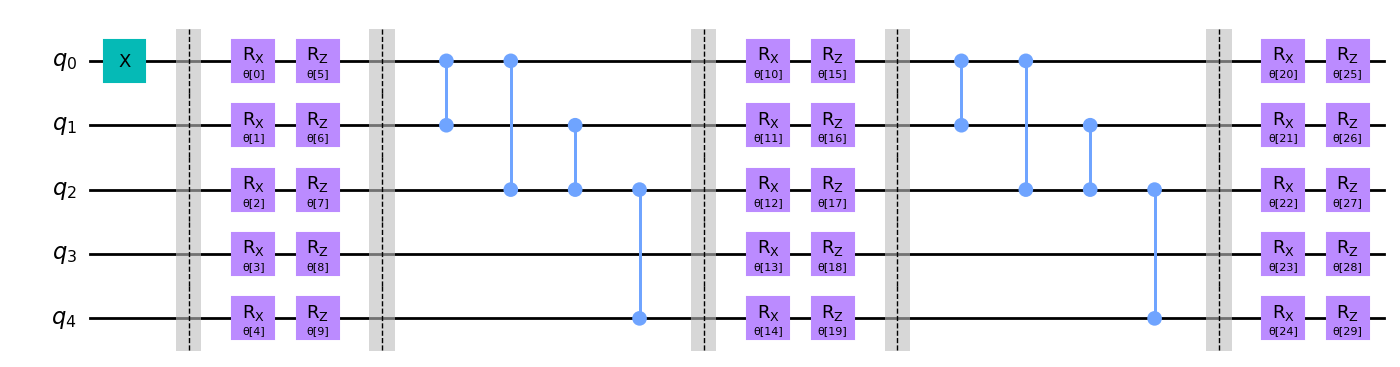

In [3]:
from qiskit.circuit.library import NLocal, CZGate, RZGate, RXGate
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

qc = QuantumCircuit(5)
qc.x(0)
qc.barrier()

theta = Parameter("θ")
ansatz = NLocal(
    initial_state = qc,
    num_qubits=5,
    rotation_blocks=[RXGate(theta), RZGate(theta)],
    entanglement_blocks = [CZGate()],
    entanglement=[[0, 1], [0, 2], [2, 1], [2, 4]],
    reps=2,
    insert_barriers=True,
)
ansatz.decompose().draw("mpl")

## TASK 3

Reproduce the following expectation values using the Qiskit estimator primitive. 

![image](image2.png)

In [10]:
from qiskit.primitives import Estimator
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp

O = SparsePauliOp(["X", "Z"], [2, -1])
estimator = Estimator()

qc1 = QuantumCircuit(1)
job = estimator.run(qc1, O)
expvals1 = job.result().values
print("Exp. val qs1: ", expvals1)

qc2 = QuantumCircuit(1)
qc2.h(0)
job = estimator.run(qc2, O)
expvals2 = job.result().values
print("Exp. val qs2: ", expvals2)

Exp. val qs1:  [-1.]
Exp. val qs2:  [2.]


## TASK 4



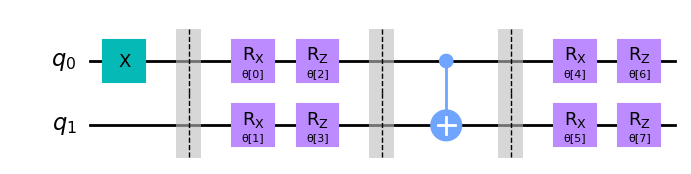

In [21]:
from qiskit.circuit.library import NLocal, CXGate, RZGate, RXGate
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

# Define an initial state with two qubits
qc = QuantumCircuit(2)
qc.x(0)
qc.barrier()

# Define an general ansatz
theta = Parameter("θ")
ansatz = NLocal(
    initial_state = qc,
    num_qubits=2,
    rotation_blocks=[RXGate(theta), RZGate(theta)],
    entanglement_blocks = [CXGate()],
    entanglement=[[0, 1]],
    reps=1,
    insert_barriers=True,
)
ansatz.decompose().draw("mpl", style='Clifford')

In [23]:
from scipy.optimize import minimize
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
import numpy as np

# Define observable and estimator 
observable = SparsePauliOp(["IZ", "ZI"], [-1,-1])
estimator = Estimator()

# Define cost function
def cost_func(params, ansatz, observable, estimator):
    cost = estimator.run(ansatz, observable, parameter_values=params).result().values[0]
    return cost

# Define initial state of parameters randomly
x0 = 2 * np.pi * np.random.rand(ansatz.num_parameters)

# Minimize using an optimization method like COBYLA, SLSQP...
res = minimize(cost_func, x0, args=(ansatz, observable, estimator), method="COBYLA")
print(res)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -1.9999999974423388
       x: [ 6.283e+00 -5.287e-06  6.774e+00  4.989e+00  9.425e+00
            3.142e+00  3.647e-01  3.334e+00]
    nfev: 132
   maxcv: 0.0


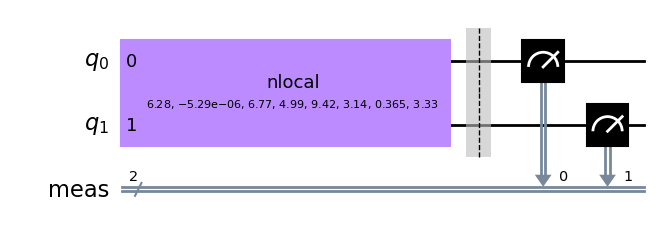

In [24]:
qc = ansatz.assign_parameters(res.x)
qc.measure_all()
qc.draw("mpl", style="clifford")

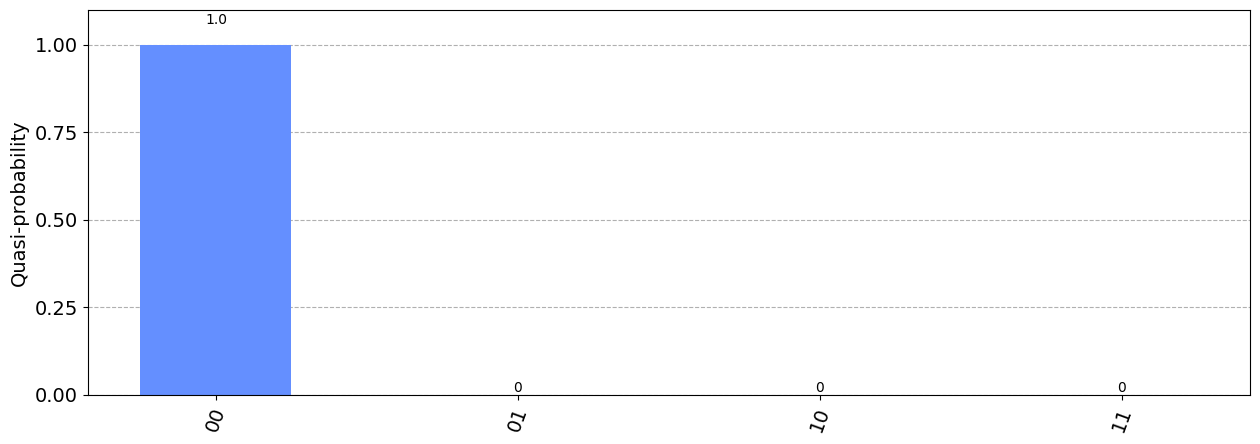

In [25]:
from qiskit.visualization import plot_distribution

samp_dist = sampler.run(qc).result().quasi_dists[0]
plot_distribution(samp_dist.binary_probabilities(), figsize=(15, 5))